In [57]:
# RFM - recovery , Frequency, Monetary

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('C:/Users/hp/Desktop/Python/dataset/Online_Retail.csv', encoding = 'ISO-8859-1', header=0)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [61]:
df = df.dropna()

In [62]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [63]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0.01]

In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397880.000000,397880.000000,397880.000000
mean,12.988358,3.116519,15294.428491
std,179.332672,22.097986,1713.145555
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [65]:
df['Amount'] = df['Quantity']* df['UnitPrice']

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [67]:
monetary = df.groupby('CustomerID')['Amount'].agg('sum')

In [68]:
monetary = monetary.reset_index()
monetary.columns = ['CustomerID','amt']
monetary.head()

,CustomerID,amt
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [69]:
# Frequency

freq = df.groupby('CustomerID')['InvoiceNo'].agg('count')

freq = freq.reset_index()



In [70]:
freq.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [71]:
max_dt = max(df['InvoiceDate'])

In [72]:
max_dt

Timestamp('2011-12-09 12:50:00')

In [73]:
df['rec'] = max_dt - df['InvoiceDate']

df['rec'] = df['rec'].apply(lambda x: x.days)

In [74]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,rec
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [75]:
recency = df.groupby('CustomerID')['rec'].agg('min')

recency = recency.reset_index()

recency['rec'] = recency['rec'] + 1

In [76]:
recency.head()

,CustomerID,rec
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [77]:
RFM = monetary.merge(freq, on= 'CustomerID')

RFM = RFM.merge(recency, on='CustomerID')

In [78]:
RFM.head()

,CustomerID,amt,InvoiceNo,rec
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


In [79]:
RFM.shape

(4338, 4)

In [80]:
RFM.columns = ['CustomerID','amt','freq','rec']

In [81]:
RFM.head()

,CustomerID,amt,freq,rec
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


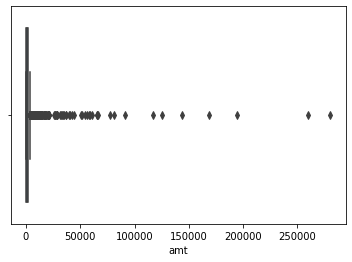

In [82]:
sns.boxplot(RFM['amt'])
plt.show()

In [83]:
q1 = RFM['amt'].quantile(0.25)
q3 = RFM['amt'].quantile(0.75)

IQR = q3 - q1

In [84]:
RFM = RFM[~((RFM['amt']<q1 - 1.5 * IQR) | (RFM['amt']> q3 + 1.5 * IQR))]

In [85]:
RFM.shape

(3911, 4)

In [86]:
print(q1, q3)

307.41499999999996 1661.7400000000007


In [87]:
print(IQR)

1354.3250000000007


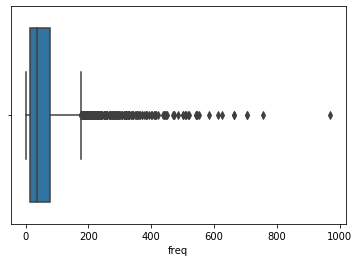

In [88]:
sns.boxplot(RFM['freq'])

In [89]:
q1 = RFM['freq'].quantile(0.25)
q3 = RFM['freq'].quantile(0.75)

IQR = q3 - q1


RFM = RFM[~((RFM['freq']<q1 - 1.5 * IQR) | (RFM['freq']> q3 + 1.5 * IQR))]

In [90]:
RFM.describe()

,CustomerID,amt,freq,rec
count,3660.000000,3660.000000,3660.000000,3660.000000
mean,15309.316667,801.875077,46.100273,104.715847
std,1717.904764,754.267170,40.892684,102.854797
min,12348.000000,3.750000,1.000000,1.000000
25%,13821.750000,264.217500,14.000000,24.000000
50%,15307.500000,530.165000,31.000000,64.000000
75%,16789.250000,1079.055000,67.000000,170.000000
max,18287.000000,3683.860000,175.000000,374.000000


Clustering Customers based on RFM values

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
RFM = RFM.drop('CustomerID', axis = 1)

In [93]:
ss = StandardScaler()

RFM0 = RFM.copy()

RFM = ss.fit_transform(RFM)

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding optimal number of clusters

In [95]:
kmeans = KMeans()

In [96]:
ssd = []

sscore = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(RFM)
    ssd.append(kmeans.inertia_)
    ss = silhouette_score(RFM, kmeans.labels_)
    sscore.append(ss)

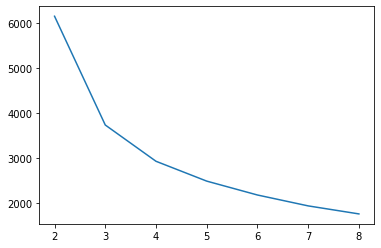

In [97]:
plt.plot(range(2,9), ssd)

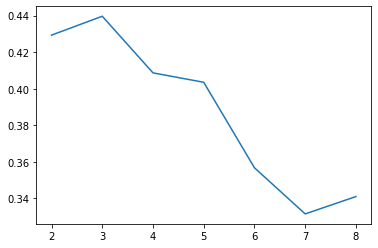

In [98]:
plt.plot(range(2,9), sscore)

In [99]:
import plusmodules as pm

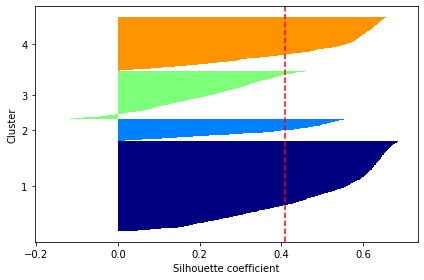

In [100]:
pm.svisualizer(RFM, 4)

In [101]:
# 4 is not right  we will now see with 3  and also we can see elbow point is at 3 in ssd

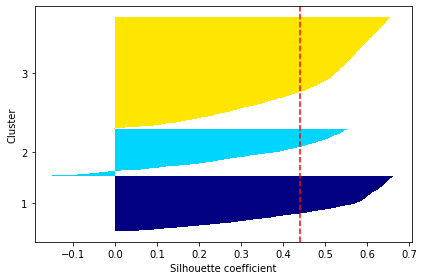

In [102]:
pm.svisualizer(RFM, 3)

In [103]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(RFM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
RFM0['cluster'] = kmeans.labels_

In [105]:
RFM0.head()

,amt,freq,rec,cluster
2,1797.24,31,75,1
3,1757.55,73,19,0
4,334.40,17,310,2
5,2506.04,85,36,0
6,89.00,4,204,2


### Profiling clusters based on the variables used for clustering

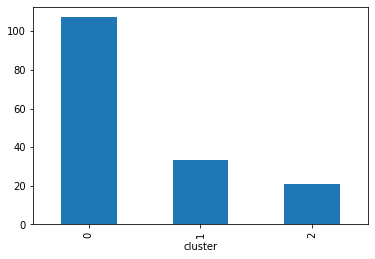

In [117]:
freq = RFM0.groupby('cluster')['freq'].agg('mean')
freq.plot.bar()
plt.show()

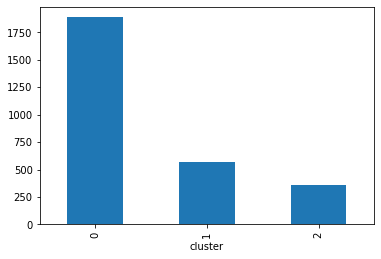

In [113]:
amt = RFM0.groupby('cluster')['amt'].agg('mean')
amt.plot.bar
plt.show()

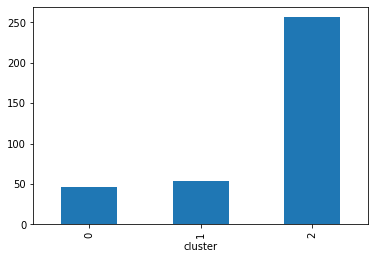

In [116]:
rec = RFM0.groupby('cluster')['rec'].agg('mean')
rec.plot.bar()
plt.show()

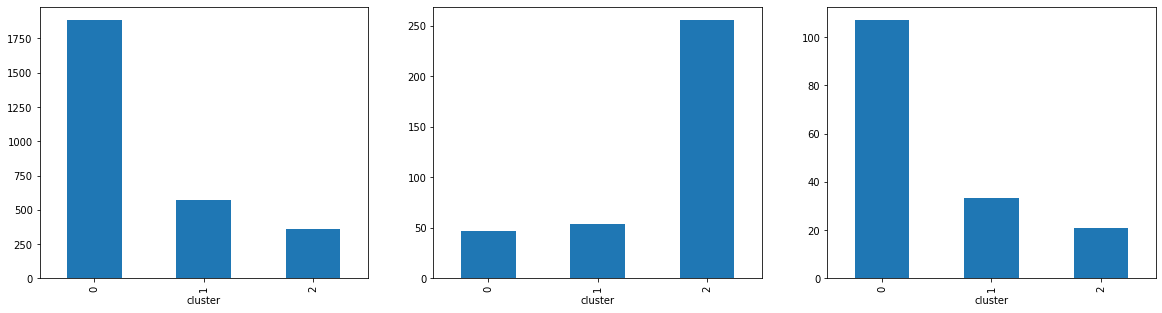

In [120]:
fig, axis = plt.subplots(1,3,figsize=(20,5))
amt.plot.bar(ax=axis[0])
rec.plot.bar(ax=axis[1])
freq.plot.bar(ax=axis[2])
